In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#PreTrained Model
from tensorflow.keras.applications import *
#Image Generator DataAugmentation
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")
#Splitting Data
# import splitfolders
from tensorflow.keras.preprocessing import image_dataset_from_directory
import random
from sklearn.cluster import KMeans
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
# Directory containing the "Train" folder
directory = "/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dataset.v1i.folder/train"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [ ]:
# Head
df_train

,filepath,label
0,/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dat...,Bacterial Leaf Spot
1,/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dat...,Bacterial Leaf Spot
2,/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dat...,Bacterial Leaf Spot
3,/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dat...,Bacterial Leaf Spot
4,/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dat...,Bacterial Leaf Spot
...,...,...
4195,/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dat...,Mosaic Disease
4196,/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dat...,Mosaic Disease
4197,/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dat...,Mosaic Disease
4198,/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dat...,Mosaic Disease


In [ ]:
# Spliting in Train and Val
from sklearn.model_selection import train_test_split
train_df , val_df = train_test_split(df_train ,train_size = 0.9 , shuffle = True ,random_state = 42 )

In [ ]:
# Shape
print(f"The shape of The Train data is: {train_df.shape}")
print(f"The shape of The Validation data is: {val_df.shape}")

The shape of The Train data is: (3780, 2)
The shape of The Validation data is: (420, 2)


In [ ]:
#Data_Dir
data_dir = '/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dataset.v1i.folder/train'

print('Training Images:')
# creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

#Testing Augmented Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

Training Images:
Found 4200 files belonging to 5 classes.
Using 3780 files for training.
Validation Images:
Found 4200 files belonging to 5 classes.
Using 420 files for validation.


In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dataset.v1i.folder/test',
    batch_size = 32,
    image_size = (256, 256),
    label_mode = None,
    shuffle=False
)
test_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

Found 200 files.


In [ ]:
# Names of the classes
class_names = train_ds.class_names


# Print the class indices
print("Class indices for training generator:", class_names)

Class indices for training generator: ['Bacterial Leaf Spot', 'Downy Mildew', 'Healthy Leaf', 'Mosaic Disease', 'Powdery_Mildew']


In [ ]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of y_train:  (32,)


In [ ]:
# Train Data
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

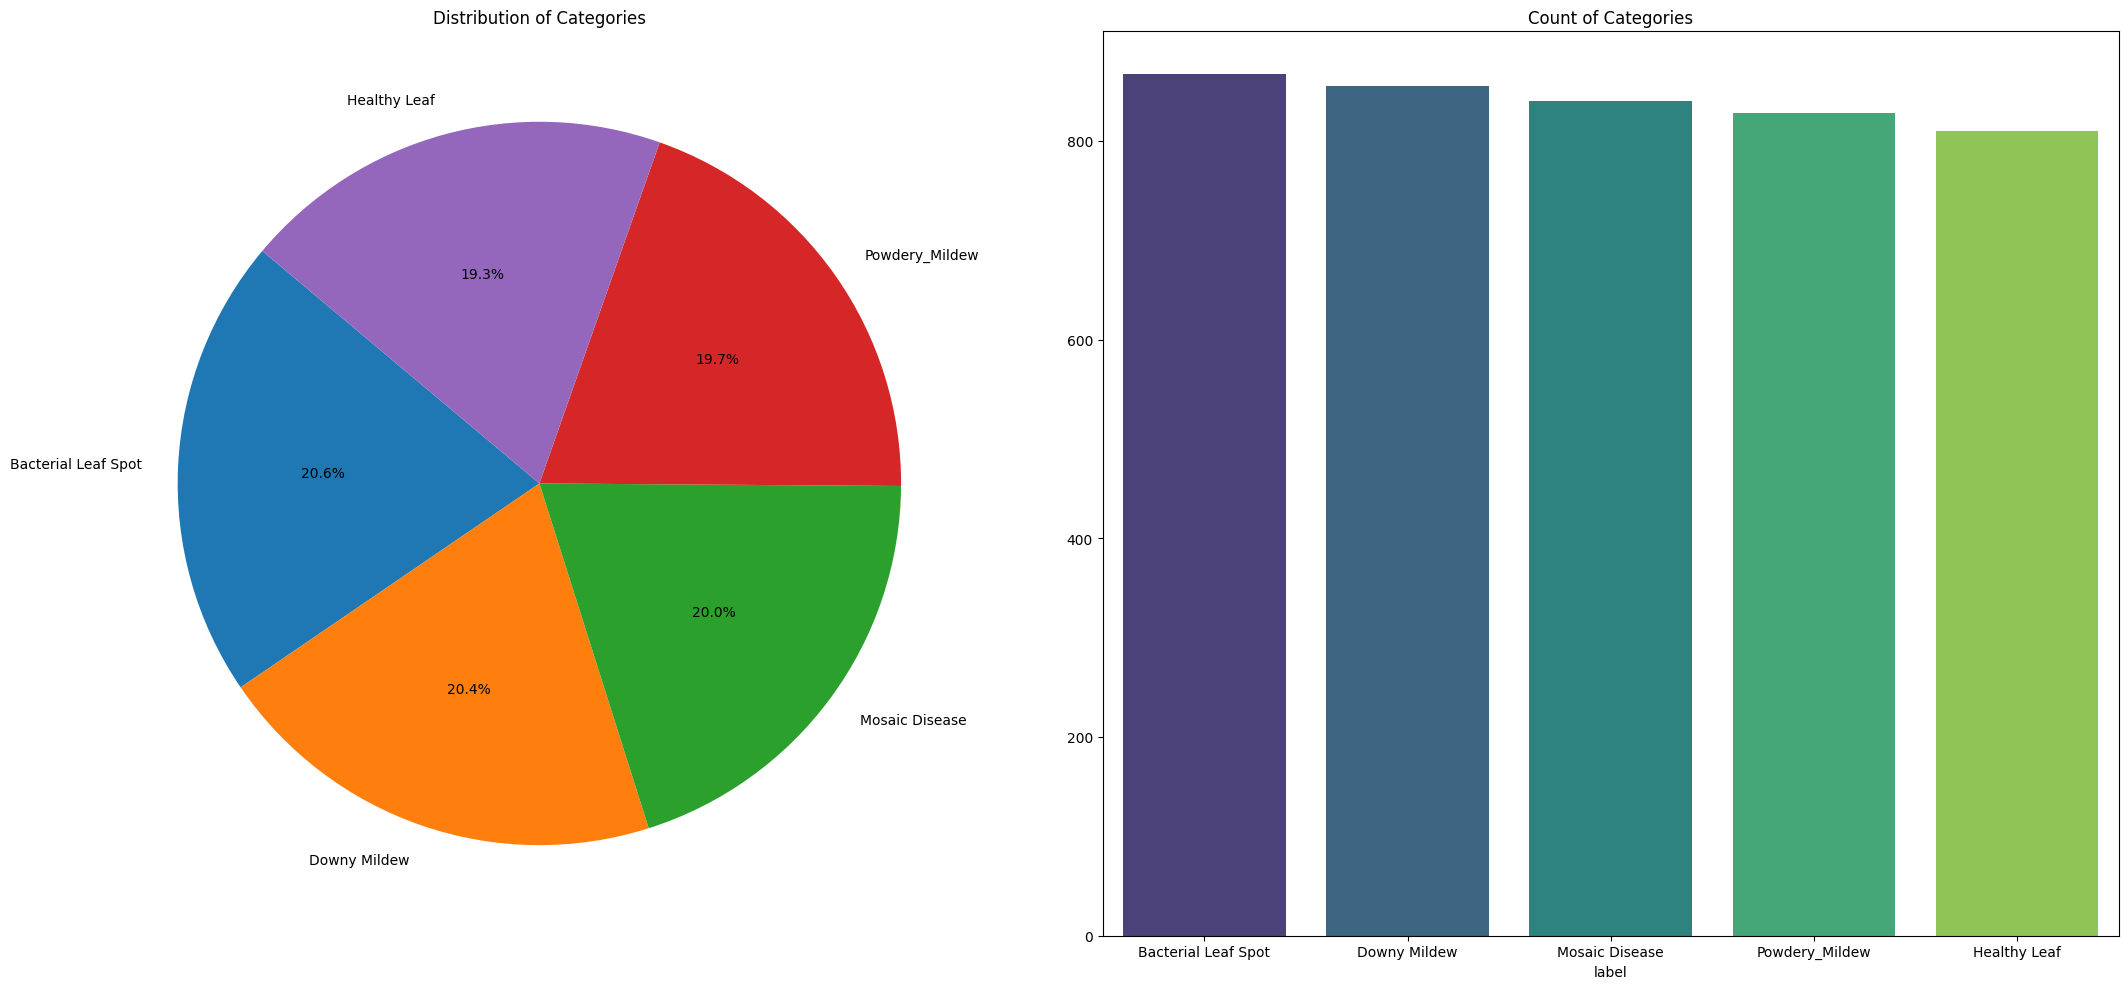

In [ ]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(22, 10), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

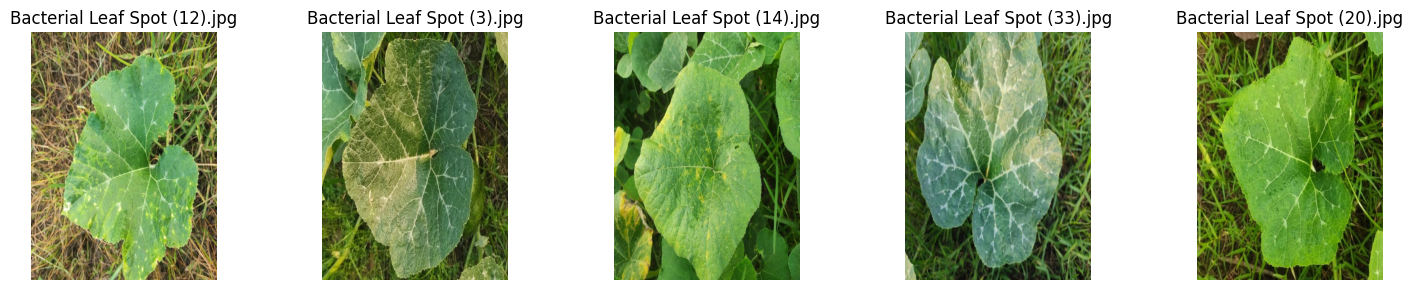

In [ ]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dataset.v1i.folder/test/Bacterial Leaf Spot"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

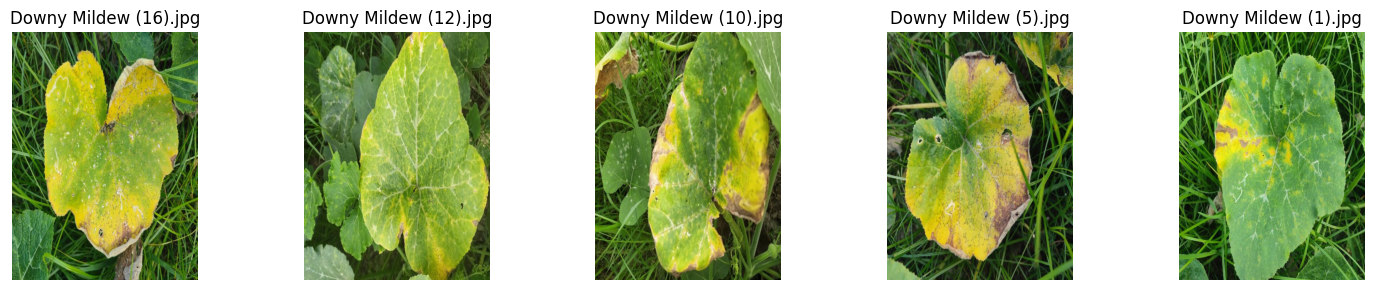

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dataset.v1i.folder/test/Downy Mildew"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

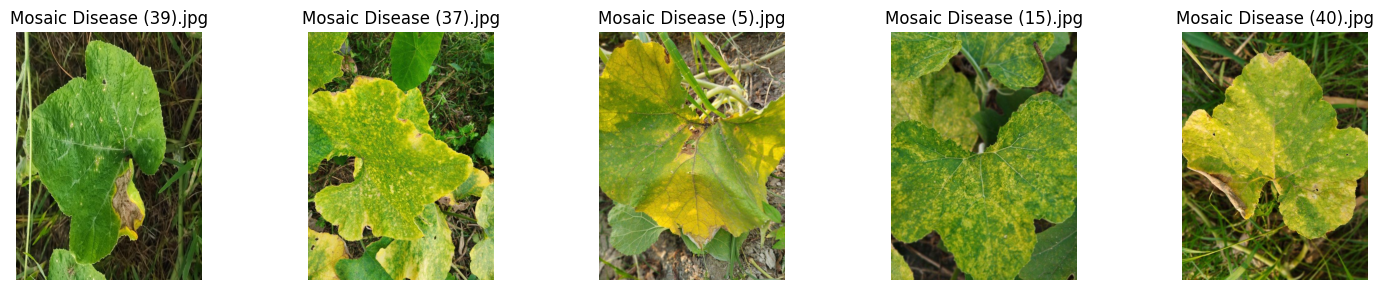

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dataset.v1i.folder/test/Mosaic Disease"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

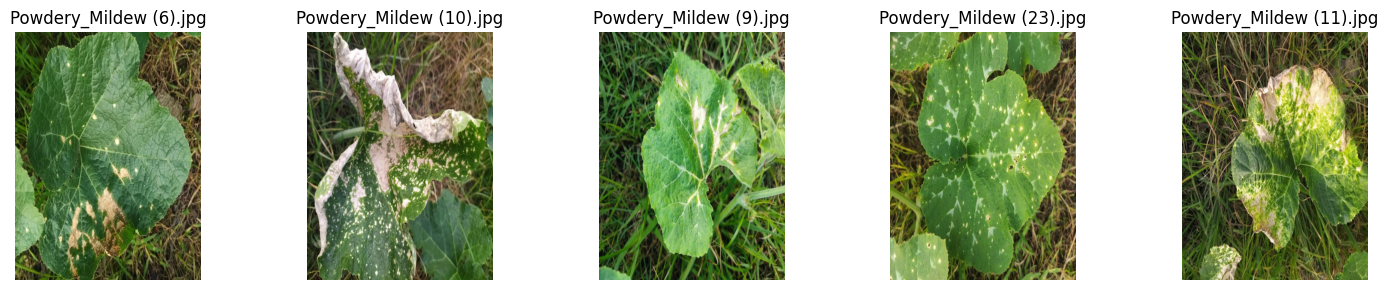

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dataset.v1i.folder/test/Powdery_Mildew"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

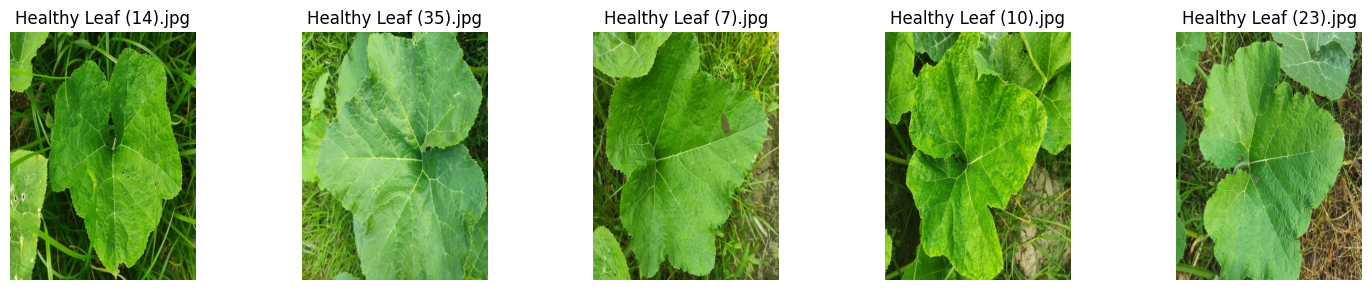

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/pumpkin-leaf-v2/Pumpkin Leaf Dataset.v1i.folder/test/Healthy Leaf"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [ ]:
# Load the pre-trained DenseNet121 model without the top classification layer
DenseNet121_base = DenseNet121(weights='imagenet',
                                    include_top=False,
                                   input_shape=(256, 256, 3),
                                     pooling = 'avg'
                                   )

# Freeze the pre-trained base model layers
DenseNet121_base.trainable = False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build the model
model = Sequential()

# Add the pre-trained DenseNet121_base
model.add(DenseNet121_base)

# Batch Normalization
model.add(BatchNormalization())

#Dropout
model.add(Dropout(0.35))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu'))


# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(len(class_names), activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
#Early_Stopping
early_stopping = EarlyStopping(
    patience=10,
    restore_best_weights=True,
)

# Train the model
history = model.fit(train_ds,
                    epochs=100,
                    validation_data=validation_ds,
                    callbacks=early_stopping)

Epoch 1/100
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1:16:50 39s/step - accuracy: 0.2188 - loss: 1.9559

I0000 00:00:1716718245.920643     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716718245.986926     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.6734 - loss: 0.8434

W0000 00:00:1716718273.546400     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716718283.932454     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716718290.760974     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 ━━━━━━━━━━━━━━━━━━━━ 84s 382ms/step - accuracy: 0.6742 - loss: 0.8417 - val_accuracy: 0.8595 - val_loss: 0.4906
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.8384 - loss: 0.4238 - val_accuracy: 0.8952 - val_loss: 0.3688
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.8670 - loss: 0.3555 - val_accuracy: 0.9048 - val_loss: 0.3109
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.8875 - loss: 0.2982 - val_accuracy: 0.9143 - val_loss: 0.2655
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.8982 - loss: 0.2810 - val_accuracy: 0.9167 - val_loss: 0.2525
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.9102 - loss: 0.2473 - val_accuracy: 0.9143 - val_loss: 0.2329
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.9232 - loss: 0.2083 - val_accuracy: 0.9262 - val_loss: 0.2257
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.9230 - loss: 0.194

In [ ]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9503 - loss: 0.1575
Validation Loss: 0.17766053974628448
Validation Accuracy: 0.9547619223594666


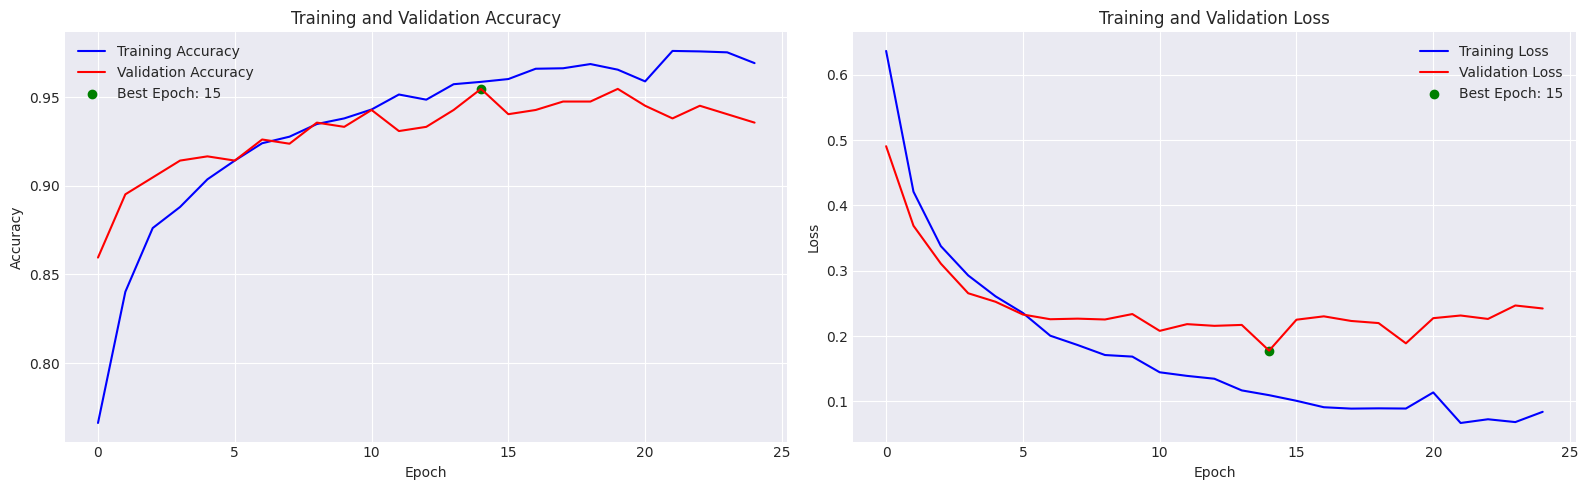

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()